# Instruments and Catalogue matching

Requested ingredients:
* fits file of a known instrument (sdss, hst, ptf, stella) having a wcs solution
* an internet connection (for the 'download_catalogue' method)

## Instrument vs. Image

An instrument has several additional functionalities in comparison to an Image.
* fundatental parameters:
   * bandname (enabling bandpass and lbda)
   * mab0 (zeropoint of the instrument)
   * _dataunits_to_election (that enables aperture photometry using sep).


**Remark**: 'Instrument' inherite from 'Image'. 

**Code Construction**: The mother class is 'Image', then a basic 'BaseInstrument' is defined that structures the future individual instruments: 'SDSS', 'HST' etc that all are classes inheriting 'BaseInstrument' (i.e. grand child of Image). 

**Info** the list of known instrument is recorded in astrobject.astrobject.instruments.instrument.KNOWN_INSTRUMENTS

In [1]:
# plot within the notebook
%matplotlib inline
# no annoying warnings
import warnings
warnings.filterwarnings('ignore')
# Astrobject module
from astrobject import instrument 

## Load the Instrument. Easy

Load the instrument, here the "sdss" object

In [2]:
sdss = instrument("data/sdss_PTF10qjq_g.fits")

The visualisation is the same as for Image (same method inherated)

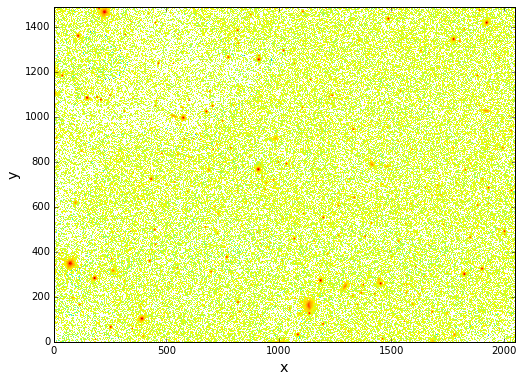

In [3]:
pl = sdss.show()

## Load a catalogue for the image's field of view

If you have access to internet, the download_catalogue() methods enables you to directly query for the catalogue associated to your image. 
When you do so, you can specify the catalogue properties:
Catalogue arguments:
* source: The origin of the catalogue (SDSS/WISE/2MASS)
* column_filters: a dictionnary selecting the catalogue sources. For instance, if you want the sdss sources that have a magnitude range in the g-band between 13 and 22: column_filters={"gmag":"13..22"} 

**Remark** This functionnality is also accessible from an 'image' object.

In [4]:
sdss.download_catalogue(source="sdss",column_filters={"gmag":"13..22"},force_it=True) 

You can now visualize the catalogue using the show() method

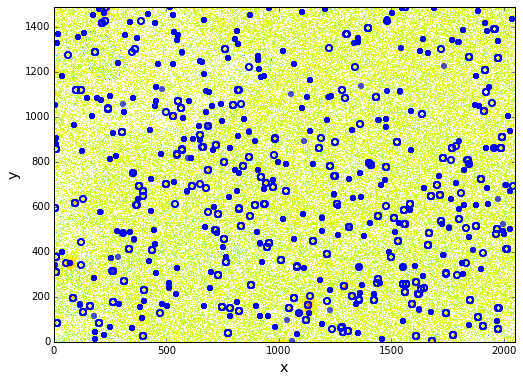

In [5]:
pl = sdss.show(show_catalogue=True)

**_Read the plot_** Full marker = stars / Open markers = non-stars (galaxies)

#### Extract the sources. 
Since the 'instrument' has a catalogue and a wcs solution, they are passed to the SexObject created (sepobjects).

**Remark** The order does not matter, if you first run sep_extract() and then load a catalogue, the catalogue will still be given to the sepobjects.

In [6]:
sdss.sep_extract()

Now than a catalogue and source extraction are associated to the image, detected sources and objects in the catalogue are matched. Let's first see what the show() methods show.

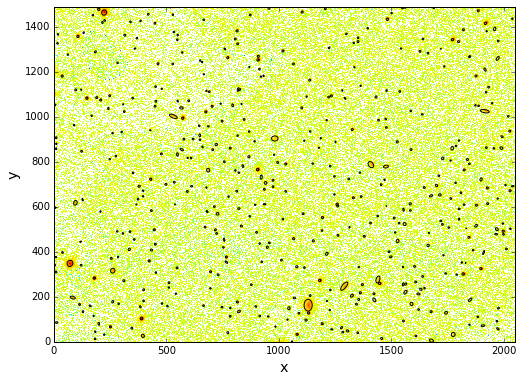

In [7]:
pl = sdss.show(show_sepobjects=True, show_catalogue=False)

**_Read the plot_** In red the objects in the catalogue with no source matched (too faint most likely). Open and filled marker show galaxies and stars respectively.

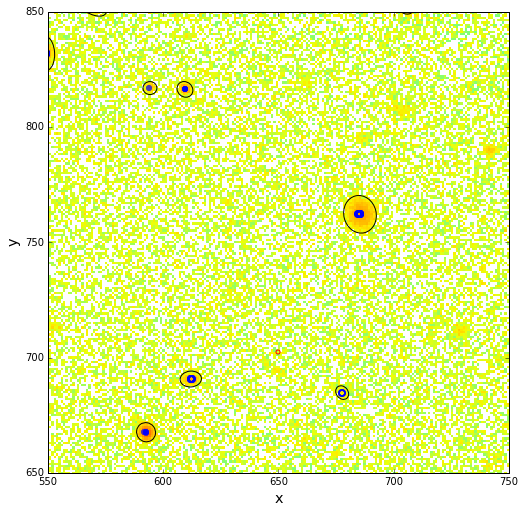

In [8]:
# lets zoom in
pl = sdss.show(zoomon=[650,750],show_sepobjects=True, show_catalogue=True, zoompxl=100)

**_Read the plot_** Full marker = stars / Open markers = non-stars (galaxies) ; Red=non detected / Blue= detected

### Catalogue and Sepobjects

The information relating the catalogue object index to the sep onces are registered in the 'catmatch' dictionnary. You can check that the sepobjects has a catalogue and catalogue matching using the 'has_catalogue()' and 'has_catmatch()' methods.

In [9]:
sdss.sepobjects.catmatch

{'angsep': <Angle [ 0.00015244, 0.00015566, 0.00016153,...,  0.00012494, 0.00014746,
          0.00016745] deg>,
 'idx': array([46, 46, 46, ..., 84, 84, 84]),
 'idx_catalogue': array([   0,    1,    2, ..., 1617, 1618, 1619])}

With a catalogue, you have access to additional information like stars mask; the catalogue knowing which object is a stars and which is not. This way you can use the "stars_only" input in a lot of methods.

**_Info masks_** The star mask is accessible though the 'starmask' array in the self function. Similarly, you have the "isolatedmask" that indicate the catalogue objects (all kinds) that do not have neighbour closer than 10arcsec. You can change this parameter using the "define_around" method of the catalogue instance.

** _Tip_** 'get_indexes()': This method enables to return the indexes of the detected sources that follow the following cuts: 

* isolated_only [False] get the indexes of the stars only
* stars_only [False] get the indexes of the isolated object only
* catmag_range [None,None] get the indexes of the object within the magnitudes ranges
* cat_indexes [False] Get the indexes of the calague object instead of the sextracted sources

In [10]:
print "The ellipse parameters x,y and theta for the detected stars"
from astropy.table import Table
mask = sdss.sepobjects.get_indexes(stars_only=True, isolated_only=False)
t_ = Table(data=[sdss.sepobjects.get("x",mask=mask),
                 sdss.sepobjects.get("y",mask=mask),
                 sdss.sepobjects.get("theta",mask=mask)],
          names=["x","y","theta"])
print t_
    

The ellipse parameters x,y and theta for the detected stars
      x             y            theta      
------------- ------------- ----------------
1058.05426482 1.18284163162  -0.180105686188
182.897510566 12.4935008926   -1.27779126167
 1456.3762291 13.9843150861   -1.03138709068
223.396105832 31.2218152577    1.06178343296
1080.48985687 32.8117379147   -1.21967339516
1350.18546563 39.5910493765   0.381773531437
183.560965507  44.211203925    1.06417262554
346.258838368 60.0258330968   -1.04877543449
984.446415525  66.888234018   -1.32343566418
251.126531266 66.2208837516   -1.38859117031
          ...           ...              ...
419.162790843  1454.7847597     1.5677216053
1500.69171637 1460.52419511  -0.360665977001
1102.98148087 1464.87023837  -0.921398639679
1885.49636547 1470.69387076   -1.41895711422
1206.02579128 1480.00125232    1.28973209858
1687.90561063 1483.97897722  -0.990932524204
223.205254748 1462.87084646    1.13180077076
199.249148617 1477.23018846  -0.81194078

### Visualization of the detected source parameters

In addition to the 'diplay()' method, that enables to display the source ellipses in a axis (used by the image.show() method, two methods exists to visualize the source properties:

* show_ellipses: illustrate the source ellipses parameters
* show_hist: histogram of any parameters (any parameters accessible though the get())

**_Tip_**: the masking inputs (stars_only etc.) are arguments of the ploting functions.

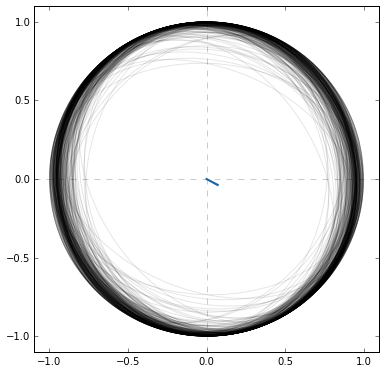

In [11]:
sdss.sepobjects.show_ellipses(stars_only=True)

**_Read the plot_** All grey lines represent the shape of each detected source ellipses. The blue line (triangle in fact, but usually really thin if a lot of sources) is the typical PSF angle; the size is the ellipticity

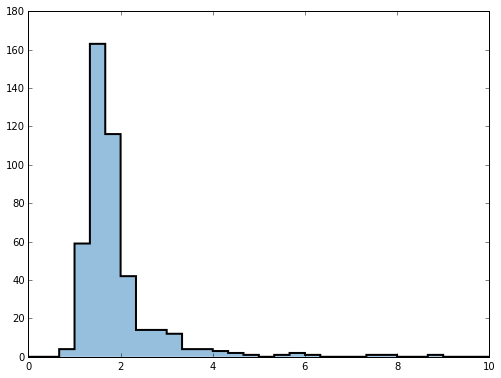

In [12]:
# show the distribution of any keyword
sdss.sepobjects.show_hist("a",bins=30, range=[0,10])

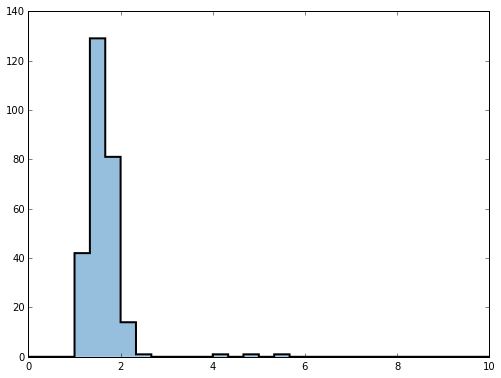

In [13]:
# - or just for the stars
sdss.sepobjects.show_hist("a",bins=30, range=[0,10], stars_only=True)